In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
df_contact = pd.read_csv('contact_data_2000.csv')

In [3]:
cellid_vec = np.unique(df_contact['cellid'])
print(cellid_vec.shape)

(1881,)


In [11]:
# Komórki dla których pokazujemy chromosom 
cellid_vec[0:5]

array(['SCG0088_AAAGGACGTTAACGGC-1', 'SCG0088_AAATCCGGTGACATAT-1',
       'SCG0088_AACAGCAAGACAGGCG-1', 'SCG0088_AACATCATCAGGTTTA-1',
       'SCG0088_AACCTTAAGCTGCACA-1'], dtype=object)

In [5]:
contact_df1 = df_contact[df_contact['cellid'] == cellid_vec[0]]
contact_df2 = df_contact[df_contact['cellid'] == cellid_vec[1]]
contact_df3 = df_contact[df_contact['cellid'] == cellid_vec[2]]
contact_df4 = df_contact[df_contact['cellid'] == cellid_vec[3]]

In [6]:
contact_df1 = contact_df1.drop('cellid', axis=1).reset_index()
contact_df2 = contact_df2.drop('cellid', axis=1).reset_index()
contact_df3 = contact_df3.drop('cellid', axis=1).reset_index()
contact_df4 = contact_df4.drop('cellid', axis=1).reset_index()

# Simba3d

In [7]:
def make_a_matrix(contact_df, nr):
    df_filtered = contact_df[contact_df['chr1'] == 'chr4-M'].copy()

    bin_size = 250_000 # Im większe tym mniejszy rozmiar
    
    def assign_bin(pos):
        return pos // bin_size
    
    df_filtered['bin1'] = df_filtered['start1'].apply(assign_bin)
    df_filtered['bin2'] = df_filtered['start2'].apply(assign_bin)
    
    max_bin = max(df_filtered['bin1'].max(), df_filtered['bin2'].max()) + 1
    contact_matrix = np.zeros((max_bin, max_bin))
    
    for _, row in df_filtered.iterrows():
        i = row['bin1']
        j = row['bin2']
        contact_matrix[i, j] += 1
        if i != j:
            contact_matrix[j, i] += 1

    print(contact_matrix.shape)
    np.save(f'contact_matrix{nr}_bin250k.npy', contact_matrix)

In [12]:
contact_dfs = [contact_df1, contact_df2, contact_df3, contact_df4]

for i, df in enumerate(contact_dfs, start=1):
    make_a_matrix(df, i)

(667, 667)
(648, 648)
(625, 625)
(677, 677)


Sprawdzam rozmiar macierzy z przykładów z gita

In [13]:
simulated_given_contact_matrix = np.load('simulated_contact_matrix.npy')

In [14]:
simulated_given_contact_matrix.shape

(80, 80)

In [22]:
# Polecenie do terminalu
# simba3d -i tasks/task01.json -t 1

# Wizualizacje 

In [16]:
# Wczytaj plik JSON z wynikami
with open('cell1.json', 'r') as f:
    data1 = json.load(f)

with open('cell2.json', 'r') as f:
    data2 = json.load(f)

with open('cell3.json', 'r') as f:
    data3 = json.load(f)

with open('cell4.json', 'r') as f:
    data4 = json.load(f)


In [23]:
def make_a_vis(data):
    curve = np.array(data['X_evol'][-1])
    n_points = curve.shape[1]
    colors = plt.cm.viridis(np.linspace(0, 1, n_points - 1))  # mapa kolorów tęczy

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Rysuj odcinki między punktami z różnymi kolorami
    for i in range(n_points - 1):
        x = [curve[0, i], curve[0, i+1]]
        y = [curve[1, i], curve[1, i+1]]
        z = [curve[2, i], curve[2, i+1]]
        ax.plot(x, y, z, color=colors[i])

    ax.set_title("3D Struktura z SIMBA3D")
    plt.show()

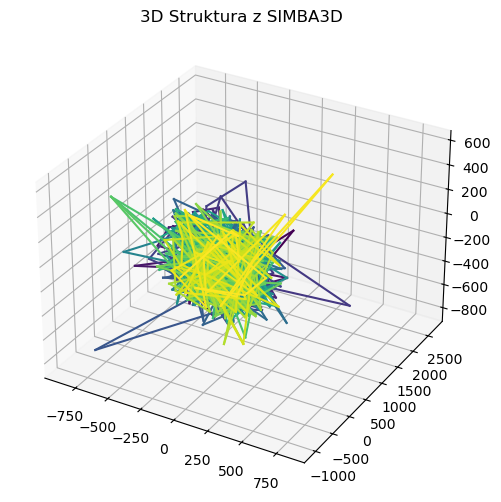

In [24]:
make_a_vis(data1)

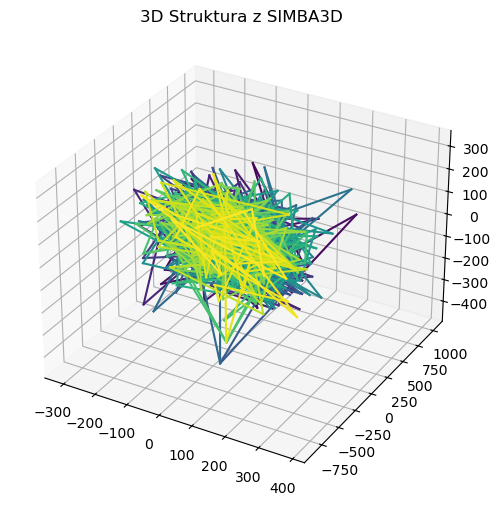

In [25]:
make_a_vis(data2)

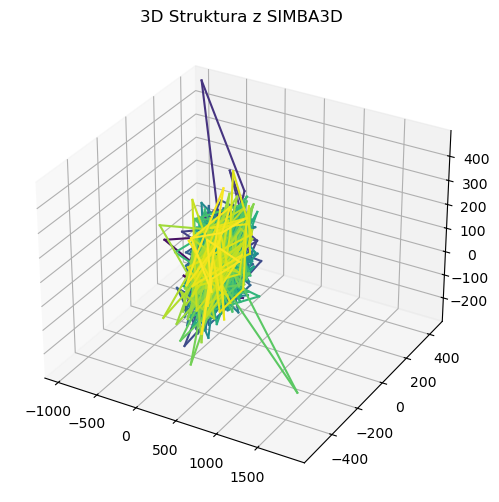

In [26]:
make_a_vis(data3)

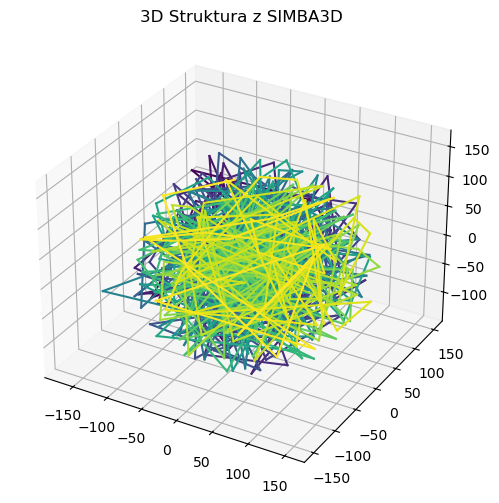

In [27]:
make_a_vis(data4)